In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Now for some quick exploratory visual analysis of our data set

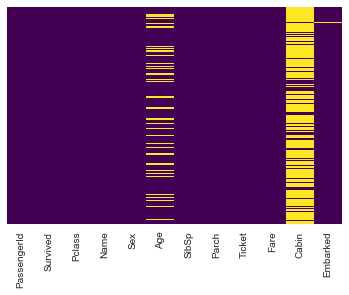

In [6]:
#this will create a heat map of the boolean values of missing data
#basically every yellow mark in the graph stands for a true point, or a point in our data set where there is null values
#this will help us decide on which columns we can impute and which columns to simply drop
#From the looks of it, the age column can be worked with, the cabin we most likely will have to slice off.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#just setting a color theme, not important
sns.set_style('whitegrid')

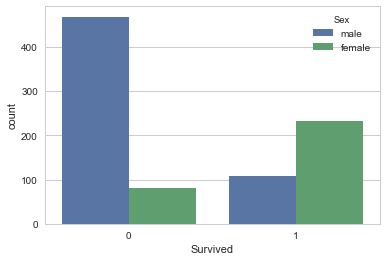

In [8]:
#this shows us the survival rate by gender
#males much more likely to die it looks like
sns.countplot(x='Survived',hue='Sex',data=train)

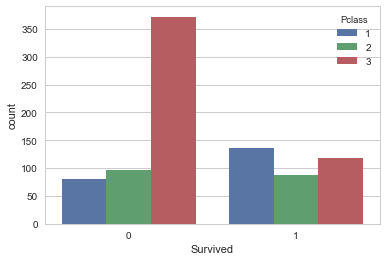

In [9]:
#this shows us the survival rate by class
#third class much more likely to die it looks like
sns.countplot(x='Survived',hue='Pclass',data=train)

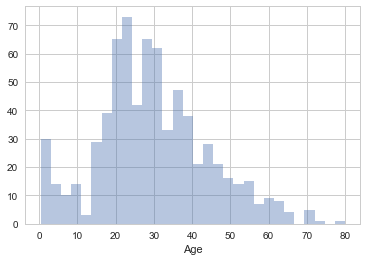

In [10]:
#lets take a look at the age distribution
#a decent amount of babies and a lot of young people in their twenties it looks like
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

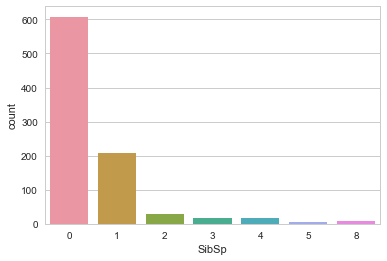

In [11]:
#now lets look at the children and spouse column
#Doesn't look like many passengers had children or spouses on board
#A lootttt of single people
sns.countplot(x='SibSp',data=train)

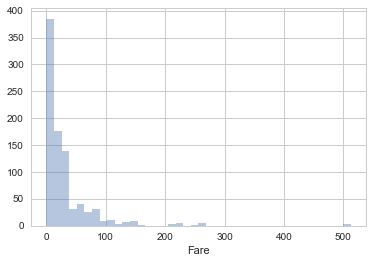

In [12]:
#now time to look at the distribution for the amount paid for a ticket
sns.distplot(train['Fare'],kde=False,bins=40)

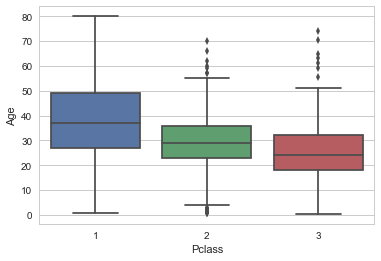

In [14]:
#passengers in first and second class tend to be older than passengers in the third class 
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
#This function will impute missing age based on the average age for each class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 #average age in first class
        elif Pclass == 2:
            return 29 #average age in second class
        else:
            return 24 #average age in third class
    else:
        return Age

In [17]:
#applying the imputation function to the designated columns
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

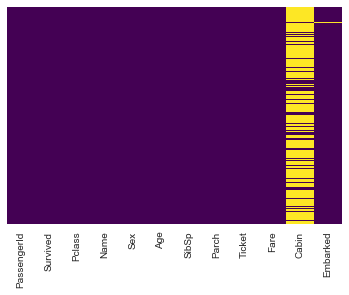

In [21]:
#now we no longer have missing values in the age column
#successfully imputed the values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
#we won't bother impute cabin column, too much missing information, so let's drop it
train.drop('Cabin',axis=1,inplace=True)

In [24]:
#Making permanent changes to all missing values in the data set
#There should no longer be null values in our data
train.dropna(inplace=True)

In [27]:
#Now we will create a dummy variable to deal with strings in categories
#Such as male and female, we will change that to 0 and 1 
sex = pd.get_dummies(train['Sex'], drop_first=True)
#Because both columns can perfectly predict the other
#such as if a column is not female, the other column must be male
#We would run into a multicollinearity issue which will mess up our ML algorithm
#So we will need to drop a column

In [28]:
#We will do the same thing to the Embarked column
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [32]:
#Now we will add our new dummy variables in as columns to our data set
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


In [38]:
#Now we will drop the actual columns we won't be using
#We won't use the Sex column because we have the dummy variable column 'Male'
#We won't use the Embarked column because we have the dummy variable column
#We won't use the Name and Ticket and PassengerID column because there isn't enough information there
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [39]:
#Now we have a good clean data set for our ML algorithm because they are all numerical values
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [41]:
#Y will always be the column you are trying to predict
#X are all the other columns so we can simply drop Survived
x = train.drop('Survived',axis=1)
y = train['Survived']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [46]:
#instantiate our model and set it to a variable, let's call it logmodel
logmodel = LogisticRegression()

In [47]:
#fit and train our model
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
#now lets predict and assign it to a variable, let's call it prediction
predictions = logmodel.predict(x_test)

In [50]:
#now lets evaluate our classification model
from sklearn.metrics import classification_report

In [54]:
#Our Logistic Regression performed decently
#Could be improved upon if we do some feature engineering on our dropped columns
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [ ]:
#Done